<center> <h1>Día 3</h1> </center>
<center> <h2>Caracterización fisicoquímica </h2> </center>

---
<center> <h2>Antes de comenzar</h2> </center>

En la celda que se encuentra a continuación vamos a importar todas las librerías que se van a usar.

❗ Para correr la celda podes apretar el boton "Run" o usar el comando "Ctrl + Enter"

👇

In [1]:
import pandas as pd
from rdkit import Chem

from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors

import matplotlib.pyplot as plt
import seaborn as sns

A lo largo de este día vamos a estar trabajando con los comandos de RDKit para hacer la caracterización fisicoquímica de una lista de moléculas.

Esta guía está elaborada en base a https://www.rdkit.org/docs/GettingStartedInPython.html

En el caso de que quieras profundizar en algún comando podrás encontrar más información en ese link.

---
<center> <h2>Introducción</h2> </center>

Christopher A. Lipinski hizo un análisis de las propiedades fisicoquímicas de los medicamentos disponibles en el mercado en el año 1997. A partir de los resultados que obtuvo, formuló una serie de reglas para predecir que tan adecuado podría ser un compuesto químico para ser administrado oralmente a un paciente.
 
1. No debe contener más de cinco donadores de enlaces por puentes de hidrógeno.
2. No debe contener más de diez aceptores de enlaces por puentes de hidrógeno.
3. Debe poseer un peso molecular inferior a 500 uma.
4. Debe poseer un coeficiente de reparto octanol-agua (log P) inferior a 5

Como pueden ver, todas las reglan contienen el número 5 o son multiplos de ese número. Por ese motivo se las conocoe como <b>la regla de cinco de Lipinski</b>

Si te interesa este tema podés leer más en este link: https://doi.org/10.1016/j.ddtec.2004.11.007

---
<center> <h2>Manos a la obra</h2> </center>

Para comenzar a trabajar vamos a generar una variable con la notación del compuesto. En este caso, vamos a usar la notación en smiles.

Luego vamos a usar la función llamada `Chem` de RDKit para generar la molécula.

❗ Para correr la celda podes apretar el boton "Run" o usar el comando "CTRL + Enter"

👇

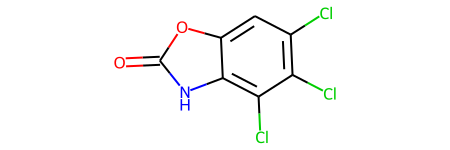

In [2]:
smiles = 'C1=C2C(=C(C(=C1Cl)Cl)Cl)NC(=O)O2'
molecula = Chem.MolFromSmiles(smiles)
molecula

Ahora vamos a calcular los predictores nombrados en la introducción.
Para hacerlo, vamos a usar la función `Descriptors` y `Chem` de RDKit. 

Esta función permite indicar que tipo de descriptor queremos calcular para una molécula.

Probemos calculando el peso molécular:

👇

In [3]:
Descriptors.ExactMolWt(molecula)

236.915111344

Podemos guardar el resultado de cada caraterística en una variable

👇

In [4]:
molecular_weight = Descriptors.ExactMolWt(molecula)
logp = Descriptors.MolLogP(molecula)
h_bond_donor = Descriptors.NumHDonors(molecula)
h_bond_acceptors = Descriptors.NumHAcceptors(molecula)
rotatable_bonds = Descriptors.NumRotatableBonds(molecula)
number_of_atoms = Chem.rdchem.Mol.GetNumAtoms(molecula)
molar_refractivity = Chem.Crippen.MolMR(molecula)
topological_surface_area_mapping = Chem.QED.properties(molecula).PSA
formal_charge = Chem.rdmolops.GetFormalCharge(molecula)
heavy_atoms = Chem.rdchem.Mol.GetNumHeavyAtoms(molecula)
num_of_rings = Chem.rdMolDescriptors.CalcNumRings(molecula)

Y podemos consultar la característica ejectuando el nombre de la variable

In [5]:
molecular_weight

236.915111344

💭 ¿Cuál será el LogP de la molécula?

❗ Escribí el comando en la celda que se encuentra debajo

👇

In [6]:
logp

3.0812999999999997

💭 ¿Cuál será el Numero de H Donors de la molécula?

❗ Escribí el comando en la celda que se encuentra debajo

👇

In [7]:
h_bond_donor

1

💭 ¿Cuál será el Numero de H Acceptors de la molécula?

❗ Escribí el comando en la celda que se encuentra debajo

👇

In [8]:
h_bond_acceptors

2

💭 En base a los resultados obtenidos en la sección anterior, ¿Con cuantos criterios de Lipinski cumple esta molécula?

👇

Podemos ver cada característica evaluando las variable con el valor necesario para que cumpla con Lipinski. 

Cuando el resultado arroje "True" quiere decir que el compuesto cumple con esa caracterísitca, si no lo hace indicará "False"

👇

In [10]:
print(molecular_weight <= 500)
print(logp <= 5)
print(h_bond_donor <= 5)
print(h_bond_acceptors <= 10)

True
True
True
True
True


💭 ¿Qué significa este resultado?

👇

---
Ahora vamos a hacer este mismo análisis con la tabla de moléculas proveniente del ensayo que usamos ayer. 

Vamos a cargar los datos usando los mismos comando que ayer

👇

In [11]:
smiles_tabla = pd.read_csv('smiles_tabla.csv')
moleculas = [Chem.MolFromSmiles(smiles) for smiles in smiles_tabla['smiles']]
smiles_tabla['moleculas'] = moleculas

💡 Cada vez que trabajemos con RDKit vamos a tener que calcular las moléculas

In [12]:
smiles_tabla

,Unnamed: 0,ID,smiles,moleculas
0,0,0,CC1=CC=C(C=C1)C(C2=NN=NN2C(C)(C)C)N(CC3=CC=CO3...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2E0...
1,1,1,C1CCN(C1)S(=O)(=O)C2=CC=C(C=C2)S(=O)(=O)NC3=CC...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2E0...
2,2,2,C1CCC(CC1)CNC2=C3CCCCC3=NC4=NN=NN24,<rdkit.Chem.rdchem.Mol object at 0x0000015D2E0...
3,3,3,CC1=CC(=C(C=C1N)C(C)C)OC.Cl,<rdkit.Chem.rdchem.Mol object at 0x0000015D2E1...
4,4,4,C1CN(CCN1C2=CC=CC=C2)C(C3=CN=CC=C3)C4=NN=NN4CC...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2E1...
...,...,...,...,...
4391,4391,4391,CCCCCCC1=C(C=C(C=C1)O)O,<rdkit.Chem.rdchem.Mol object at 0x0000015D2DF...
4392,4392,4392,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCN=C(N)N)C(=O)N...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2DF...
4393,4393,4393,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2DF...
4394,4394,4394,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2DF...


C:\Users\Mercedes_IIB-UNSAM\anaconda3\envs\my-rdkit-env\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:241: UserWarning: Truncating the list of molecules to be displayed to 196. Change the maxMols value to display more.
  warnings.warn(


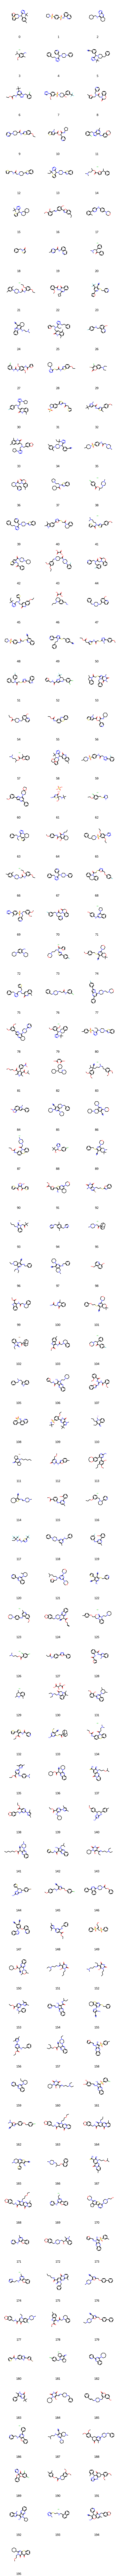

In [13]:
Chem.Draw.MolsToGridImage(smiles_tabla['moleculas'], legends = [(str(smiles_tabla['ID'][i])) for i in range(len(smiles_tabla))],maxMols = 196)

Vamos a definir una para calcular sus propiedad fisicoquímicas.
Las funciones que venimos usando hasta ahora estaban definidas por default. 

La función que necesitamos hoy no existe, asi que la vamos a crear usando `def`. 

❗ No es uno de los objetivos de este curso que sepan definir funciones. La dejamos definida para usarla durante las próximas actividades.

👇

In [43]:
def drug_likness_decriptors(df):
    pd.options.mode.chained_assignment = None
    NumHDonors_list = []
    NumHAcceptors_list = []
    MW_list = []
    LogP_list = []
    rotatable_bonds_list = []
    for element in df['moleculas']:
        try:
            NumHDonors = Descriptors.NumHDonors(element)
            NumHDonors_list.append(NumHDonors)
        except:
            NumHDonors_list.append('N/A')
            pass
        try:
            NumHAcceptors = Descriptors.NumHAcceptors(element)
            NumHAcceptors_list.append(NumHAcceptors)
        except:
            NumHAcceptors_list.append('N/A')
            pass
        try:
            MW = Descriptors.ExactMolWt(element)
            MW_list.append(MW)
        except:
            MW_list.append('N/A')
            pass
        try:
            LogP = Descriptors.MolLogP(element)
            LogP_list.append(LogP)
        except:
            LogP_list.append('N/A')
            pass
        try:
            rotatable_bonds = Descriptors.NumRotatableBonds(element)
            rotatable_bonds_list.append(rotatable_bonds)
        except:
            rotatable_bonds_list.append('N/A')
            pass
    
    df['HBD'] = NumHDonors_list
    df['HBA'] = NumHAcceptors_list
    df['MW'] = MW_list
    df['logP'] = LogP_list
    df['nRotB'] = rotatable_bonds_list
    
    return(df)

In [44]:
smiles_tabla = drug_likness_decriptors(smiles_tabla)

💭 ¿Que obtuvimos luego de ejecutar ese comando?

❗ Escribí la variable que generamos en la celda que se encuentra debajo

👇

In [45]:
smiles_tabla

,Unnamed: 0,ID,smiles,moleculas,NumHDonors,NumHAcceptors,MW,logP,RotatableBonds,lipinski
0,0,0,CC1=CC=C(C=C1)C(C2=NN=NN2C(C)(C)C)N(CC3=CC=CO3...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2E0...,0,7,421.193631,5.18282,7,0
1,1,1,C1CCN(C1)S(=O)(=O)C2=CC=C(C=C2)S(=O)(=O)NC3=CC...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2E0...,1,5,417.081698,2.82010,5,1
2,2,2,C1CCC(CC1)CNC2=C3CCCCC3=NC4=NN=NN24,<rdkit.Chem.rdchem.Mol object at 0x0000015D2E0...,1,6,286.190595,2.39030,3,1
3,3,3,CC1=CC(=C(C=C1N)C(C)C)OC.Cl,<rdkit.Chem.rdchem.Mol object at 0x0000015D2E1...,1,2,215.107692,3.13102,2,1
4,4,4,C1CN(CCN1C2=CC=CC=C2)C(C3=CN=CC=C3)C4=NN=NN4CC...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2E1...,0,7,425.232794,3.22240,7,1
...,...,...,...,...,...,...,...,...,...,...
4391,4391,4391,CCCCCCC1=C(C=C(C=C1)O)O,<rdkit.Chem.rdchem.Mol object at 0x0000015D2DF...,2,2,194.130680,3.22060,5,1
4392,4392,4392,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCN=C(N)N)C(=O)N...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2DF...,6,21,1245.855001,4.20790,48,0
4393,4393,4393,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2DF...,5,22,1277.852225,6.18900,51,0
4394,4394,4394,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2DF...,5,21,1300.958738,7.61870,53,0


---
<center> <h2>¡Vamos a graficar!</h2> </center>

La tabla contiene mucha información y resulta dificil sacar conclusiones a partir de los datos. Por eso, vamos a graficar las propiedades fisicoquímicas que calculamos para tener un panorama más claro.

Existen dos librerías para graficar en python:
- Matplotlib (https://matplotlib.org/)
- Seaborn https://seaborn.pydata.org/

¡Vamos a probar como se ve el grafico de tipo hisograma en ambas!

---

<h3>Matplotlib</h3>

Si quieren leer más al respecto de histogramas en Matplotlib pueden ingresar al siguiente link:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Empecemos por el comando básico

👇

<AxesSubplot:ylabel='Frequency'>

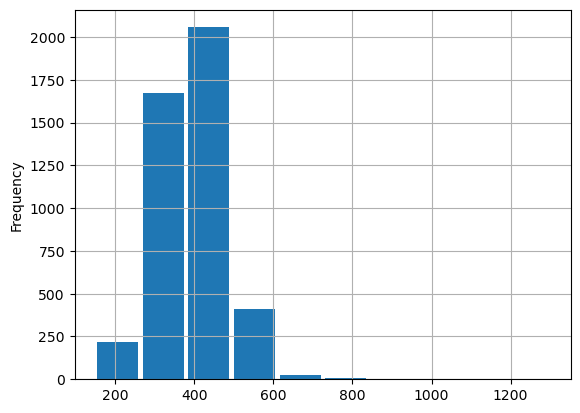

In [17]:
smiles_tabla['MW'].plot.hist(grid=True, bins=10, rwidth=0.9)

Este gráfico se puede mejorar agregando algunas lineas de código

👇

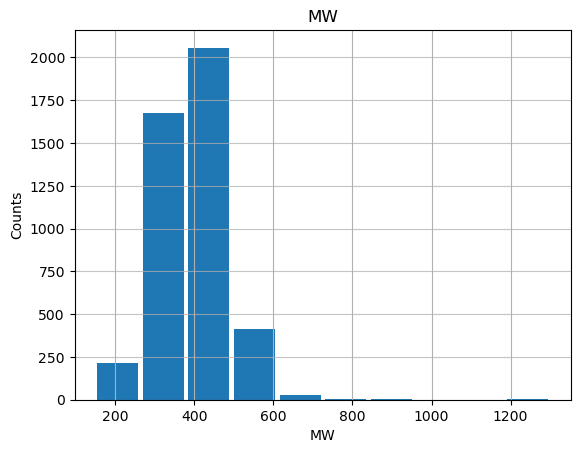

In [18]:
smiles_tabla['MW'].plot.hist(grid=True, bins=10, rwidth=0.9)
plt.title('MW')
plt.xlabel('MW')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

💭 ¿Podés hacer el histograma del LogP?

❗ Escribí el comando en la celda que se encuentra debajo

👇

Modificando un poco el código anterior podemos graficar todos los descriptores

👇

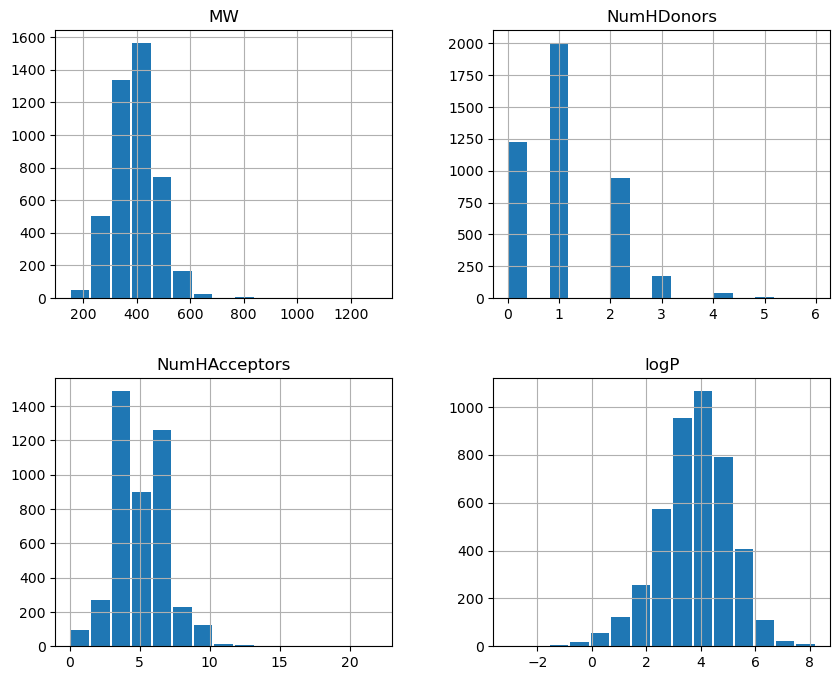

In [54]:
smiles_tabla[['MW', 'HBD', 'HBA', 'logP']].hist(
    bins=15,
    figsize=(10, 8),
    rwidth = 0.9,
)

plt.savefig("plt_histogramas.jpg")
plt.show()


---

<h3>Seaborn</h3>

Si quieren leer más al respecto de histogramas en Seaborn pueden ingresar al siguiente link:
https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot

Empecemos por el comando básico

👇

<AxesSubplot:xlabel='MW', ylabel='Count'>

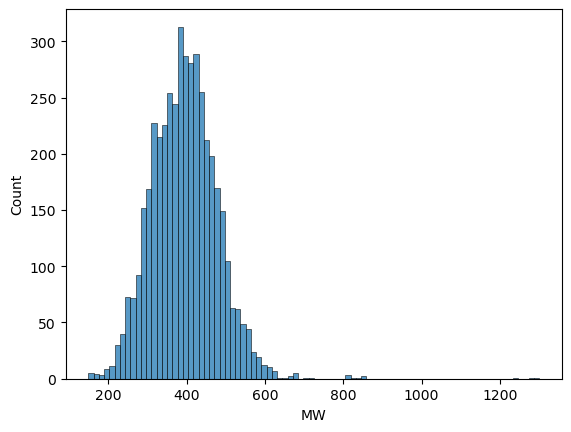

In [20]:
sns.histplot(smiles_tabla['MW'])

💭 ¿Podés hacer el histograma del LogP?

❗ Escribí el comando en la celda que se encuentra debajo

👇

Modificando un poco el código anterior podemos graficar todos los descriptores

👇

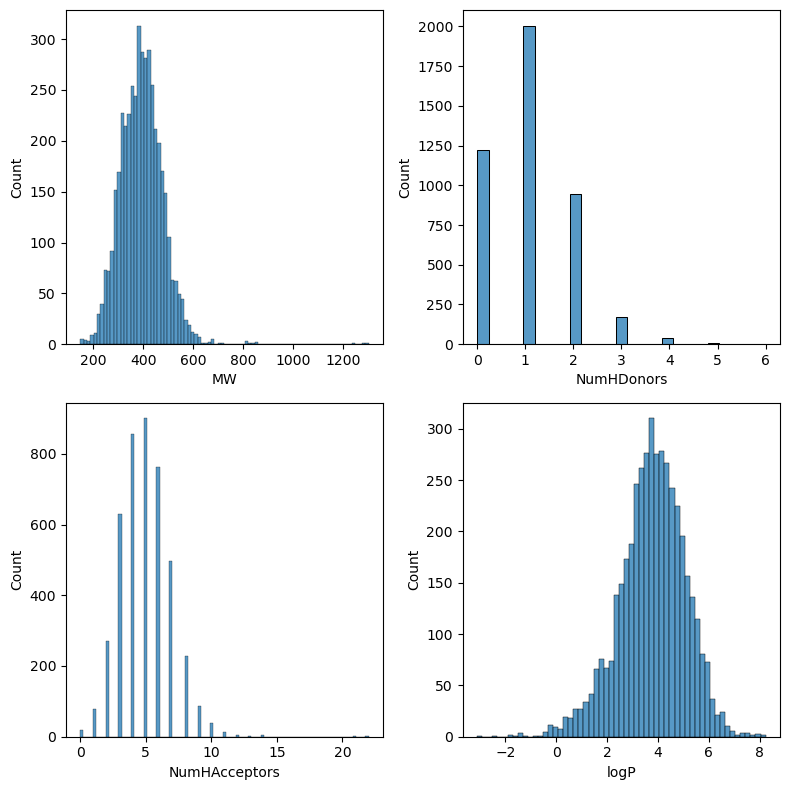

In [52]:
fig,axs = plt.subplots(2,2, figsize = (8,8))

sns.histplot(smiles_tabla['MW'], ax=axs[0,0])
sns.histplot(smiles_tabla['HBD'], ax=axs[0,1])
sns.histplot(smiles_tabla['HBA'], ax=axs[1,0])
sns.histplot(smiles_tabla['logP'], ax=axs[1,1])

fig.tight_layout()

plt.savefig('sns_histogramas.png')

---

<h3> Características compatibles con las reglas de Lipinski </h3>

Vamos a generar una columna vacía para poder volcar los datos necesarios para seleccionar los compuestos que son compatibles con las reglas de Lipinski 

👇

In [ ]:
smiles_tabla['lipinski'] = 0

Ahora vamos a recorrer todos los compuestos de la tabla para identificar cuales cumplen con las reglas. En el caso de que ese compuesto cumpla, se agregará un 1 a la columna que creamos. 

👇

In [22]:
for i in range(len(smiles_tabla)):
    if smiles_tabla['MW'][i] <= 500 and smiles_tabla['logP'][i] <= 5 and smiles_tabla['HBD'][i] <= 5 and smiles_tabla['HBA'][i] <= 10:
        smiles_tabla['lipinski'][i] = 1

💭 ¿Que obtuvimos luego de ejecutar ese comando?

❗ Escribí la variable que generamos en la celda que se encuentra debajo

👇

In [23]:
smiles_tabla

,Unnamed: 0,ID,smiles,moleculas,NumHDonors,NumHAcceptors,MW,logP,RotatableBonds,lipinski
0,0,0,CC1=CC=C(C=C1)C(C2=NN=NN2C(C)(C)C)N(CC3=CC=CO3...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2E0...,0,7,421.193631,5.18282,7,0
1,1,1,C1CCN(C1)S(=O)(=O)C2=CC=C(C=C2)S(=O)(=O)NC3=CC...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2E0...,1,5,417.081698,2.82010,5,1
2,2,2,C1CCC(CC1)CNC2=C3CCCCC3=NC4=NN=NN24,<rdkit.Chem.rdchem.Mol object at 0x0000015D2E0...,1,6,286.190595,2.39030,3,1
3,3,3,CC1=CC(=C(C=C1N)C(C)C)OC.Cl,<rdkit.Chem.rdchem.Mol object at 0x0000015D2E1...,1,2,215.107692,3.13102,2,1
4,4,4,C1CN(CCN1C2=CC=CC=C2)C(C3=CN=CC=C3)C4=NN=NN4CC...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2E1...,0,7,425.232794,3.22240,7,1
...,...,...,...,...,...,...,...,...,...,...
4391,4391,4391,CCCCCCC1=C(C=C(C=C1)O)O,<rdkit.Chem.rdchem.Mol object at 0x0000015D2DF...,2,2,194.130680,3.22060,5,1
4392,4392,4392,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCN=C(N)N)C(=O)N...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2DF...,6,21,1245.855001,4.20790,48,0
4393,4393,4393,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2DF...,5,22,1277.852225,6.18900,51,0
4394,4394,4394,CC[C@H](C)CC1=CN(N=N1)[C@@H](CCCCN)C(=O)NCCCCC...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2DF...,5,21,1300.958738,7.61870,53,0


Ahora vamos a seleccionar todas las filas correspondientes a compuestos que cumplen con las reglas de Lipinski

👇

In [24]:
smiles_tabla_druglike = (smiles_tabla[(smiles_tabla.lipinski==1)])
smiles_tabla_druglike = smiles_tabla_druglike.reset_index()
smiles_tabla_druglike = smiles_tabla_druglike.drop(columns=['index', 'Unnamed: 0'])

💭 ¿Que obtuvimos luego de ejecutar ese comando?

❗ Escribí la variable que generamos en la celda que se encuentra debajo

👇

In [47]:
smiles_tabla_druglike

,ID,smiles,moleculas,NumHDonors,NumHAcceptors,MW,logP,RotatableBonds,lipinski
0,1,C1CCN(C1)S(=O)(=O)C2=CC=C(C=C2)S(=O)(=O)NC3=CC...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2E0...,1,5,417.081698,2.82010,5,1
1,2,C1CCC(CC1)CNC2=C3CCCCC3=NC4=NN=NN24,<rdkit.Chem.rdchem.Mol object at 0x0000015D2E0...,1,6,286.190595,2.39030,3,1
2,3,CC1=CC(=C(C=C1N)C(C)C)OC.Cl,<rdkit.Chem.rdchem.Mol object at 0x0000015D2E1...,1,2,215.107692,3.13102,2,1
3,4,C1CN(CCN1C2=CC=CC=C2)C(C3=CN=CC=C3)C4=NN=NN4CC...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2E1...,0,7,425.232794,3.22240,7,1
4,5,CC(C)(C)N1C(=NN=N1)C(C2=CC=CC(=C2)C#N)N3CCC(CC...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2E1...,0,6,414.253195,4.34388,5,1
...,...,...,...,...,...,...,...,...,...
3413,4385,CCOC(=O)C1=C(SC2=C1CC(NC2(C)C)(C)C)NC(=O)CSC3=...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2DF...,3,7,486.175933,4.99972,6,1
3414,4386,CCOC(=O)C1=C(C=C(S1)NC(=O)CN2C(=O)C3(CC(CC(C3)...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2DF...,2,6,435.182792,3.30852,5,1
3415,4387,C1CCN(CC1)C2=C(C=C(C=C2)S(=O)(=O)N3CCCCC3)NC(=...,<rdkit.Chem.rdchem.Mol object at 0x0000015D2DF...,1,5,475.194106,4.00810,7,1
3416,4390,CC(C)NC1=CC=C(C=C1)NC2=CC=CC=C2,<rdkit.Chem.rdchem.Mol object at 0x0000015D2DF...,2,2,226.146999,4.25050,4,1


Podemos usar un comando el siguiente comando para dibujar todas las moléculas de la tabla

👇

C:\Users\Mercedes_IIB-UNSAM\anaconda3\envs\my-rdkit-env\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:241: UserWarning: Truncating the list of molecules to be displayed to 177. Change the maxMols value to display more.
  warnings.warn(


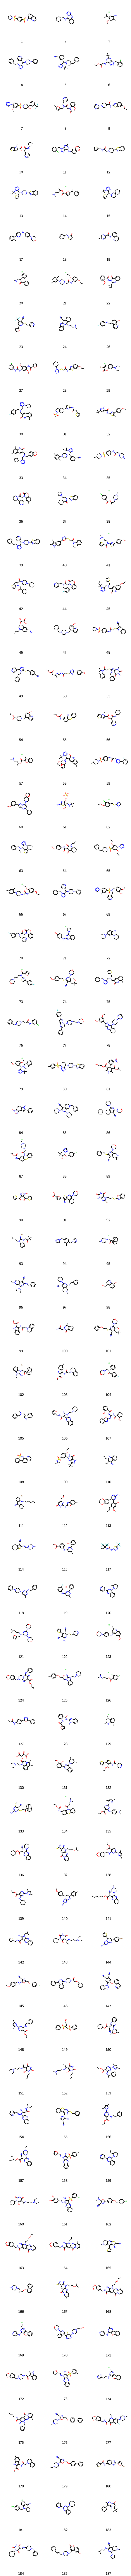

In [25]:
Chem.Draw.MolsToGridImage(smiles_tabla_druglike['moleculas'], legends = [(str(smiles_tabla_druglike['ID'][i])) for i in range(len(smiles_tabla_druglike))], maxMols = 177)

Vamos a ver como quedaron los histogramas de la nueva tabla

👇

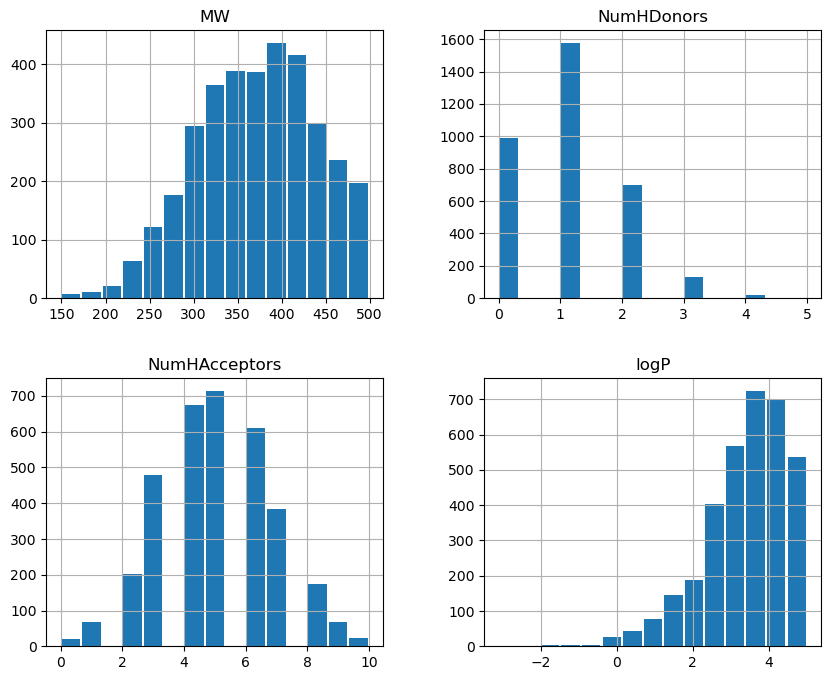

In [26]:
smiles_tabla_druglike[['MW', 'HBD', 'HBA', 'logP']].hist(
    bins=15,
    figsize=(10, 8),
    rwidth = 0.9,
)
plt.show()

¡Es dificil compararlos asi!

Vamos a dibujar una carácteristica a la vez, comparando la lista completa de compuestos con la selección.

👇

<AxesSubplot:xlabel='MW', ylabel='Count'>

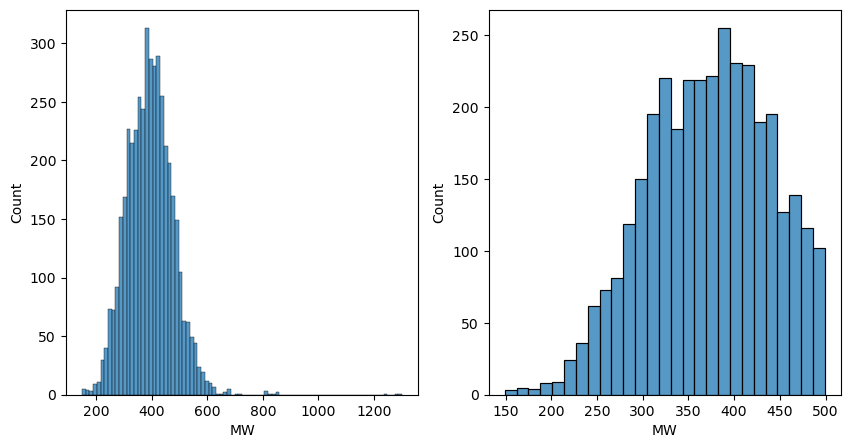

In [27]:
fig,axs = plt.subplots(1,2, figsize = (10,5))

sns.histplot(smiles_tabla['MW'], ax=axs[0])
sns.histplot(smiles_tabla_druglike['MW'], ax=axs[1])


¡Ahora comparemos todas las características!

👇

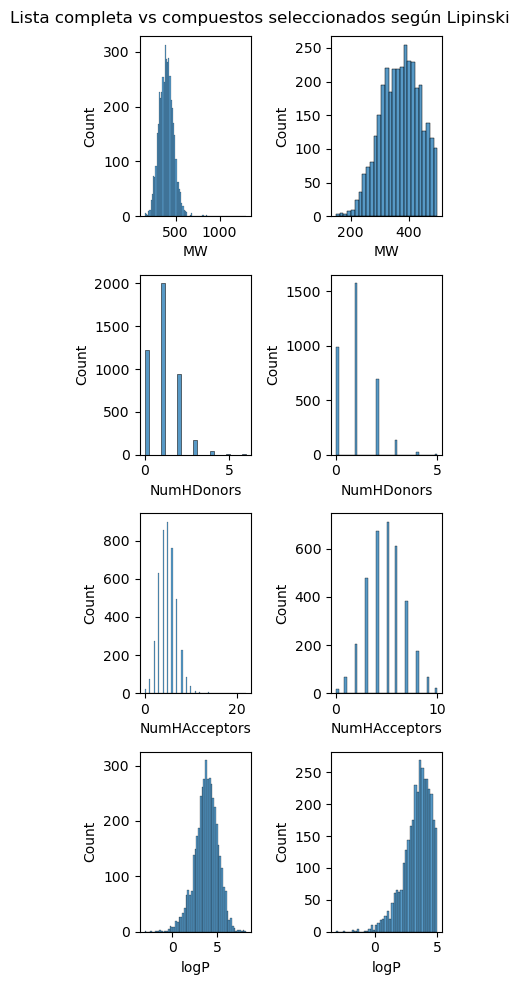

In [42]:
fig,axs = plt.subplots(4,2, figsize = (4,10))

sns.histplot(smiles_tabla['MW'], ax=axs[0,0])
sns.histplot(smiles_tabla_druglike['MW'], ax=axs[0,1])
sns.histplot(smiles_tabla['HBD'], ax=axs[1,0])
sns.histplot(smiles_tabla_druglike['HBD'], ax=axs[1,1])
sns.histplot(smiles_tabla['HBA'], ax=axs[2,0])
sns.histplot(smiles_tabla_druglike['HBA'], ax=axs[2,1])
sns.histplot(smiles_tabla['logP'], ax=axs[3,0])
sns.histplot(smiles_tabla_druglike['logP'], ax=axs[3,1])

fig.suptitle("Lista completa vs compuestos seleccionados según Lipinski")
fig.tight_layout()

plt.savefig('sns_comparacion_histogramas.png')

💭 ¿Que cambios observas en los datos luego de la selección?

👇

---
<center> <h2>Actividad</h2> </center>

<center> <h3>¡Ahora te toca hacer el análisis a vos!</h3> </center>

<b>La regla de cinco de Lipinski</b> luego fue optimizada para identificar compuestos que sean lead-like, esto quiere decir que tienen:

1. Características químicas simples, susceptibles de optimización química 
2. Pertenencia a una serie SAR establecida
3. Situación favorable de la patente
4. Buenas propiedades de absorción, distribución, metabolismo y excreción (ADME)

Si te interesa este tema podés leer más aca: doi:10.1021/ci010366a

La optimización establece que para que una molécula sea lead-like debe tener:

1. Coeficiente de partición octanol-agua log P no superior a 3
2. Masa molecular inferior a 300 daltons
3. No más de 3 donantes de enlaces de hidrógeno
4. No más de 3 aceptores de enlaces de hidrógeno
5. No más de 3 enlaces giratorios

Como pueden ver, todas las reglan contienen el número 3 o son multiplos de ese número. Por ese motivo se las conocoe como <b>la regla de los tres</b>

Vamos a usar esta información para identificar cuales compuestos de nuestra lista cumplen con estos criterioe

❗ Seguí los siguientes pasos:

1) Generá una columna en la tabla para indicar si un compuesto cumple con la regla de los tres
2) Arma una nueva tabla con los compuestos que cumplen con la regla de los tres
3) Dibujá la estructura de las moléculas de la tabla nueva
4) Armá histograma con las características relacionadas a esta regla
5) Compará los histogramas de la lista completa con la nueva lista


❗ Escribí los comandos en la celda que se encuentra debajo o agregá la cantidad de celdas que consideres necesarias.

👇